# FoodHub Data Analysis

In [2]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# to restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Understanding the structure of the data

In [4]:
# uncomment and run the following lines for Google Colab
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
# The following code snippet reads the dataset from the local machine
df = pd.read_csv("foodhub_order.csv")

In [6]:
# Reading the first 5 rows of the dataset
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [7]:
# Printing the number of rows and columns in the dataset
print("The Dataset has", df.shape[0], "rows", "and", df.shape[1], "columns")

The Dataset has 1898 rows and 9 columns


#### Observations:
##### Provided Dataset has 1898 rows and 9 colomns

In [8]:
# Checking the datatype of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
* The dataset has 9 columns
* 5 columns are numerical type and 4 columns are object type
* No missing values in the dataset

In [9]:
# Checking if there are any cells in the dataset with missing values
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
* No missing values in the dataset.



In [10]:
# Checking statistical measures of the dataset
df.describe(include = "all")

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
count,1898.00,1898.00,1898,1898,1898.00,1898,1898,1898.00,1898.00
unique,NaN,NaN,178,14,NaN,2,4,NaN,NaN
top,NaN,NaN,Shake Shack,American,NaN,Weekend,Not given,NaN,NaN
freq,NaN,NaN,219,584,NaN,1351,736,NaN,NaN
mean,1477495.50,171168.48,NaN,NaN,16.50,NaN,NaN,27.37,24.16
std,548.05,113698.14,NaN,NaN,7.48,NaN,NaN,4.63,4.97
min,1476547.00,1311.00,NaN,NaN,4.47,NaN,NaN,20.00,15.00
25%,1477021.25,77787.75,NaN,NaN,12.08,NaN,NaN,23.00,20.00
50%,1477495.50,128600.00,NaN,NaN,14.14,NaN,NaN,27.00,25.00
75%,1477969.75,270525.00,NaN,NaN,22.30,NaN,NaN,31.00,28.00


#### Observations:
* The average time to prepare food is 27 minutes
* The minimum time to prepare food is 20 minutes
* The maximum time to prepare food is 35 minutes

In [11]:
# Printing the variety of unique values in the column rating
print("Unique Values in column rating are:", df.rating.unique())
# Counting and printing the number of orders with the rating "Not given" in column "rating"
print('The number of orders with rating "Not given" are', (df['rating'] == 'Not given').sum())

Unique Values in column rating are: ['Not given' '5' '3' '4']
The number of orders with rating "Not given" are 736


#### Observations:
* Ratings are not given to 736 orders

### Exploratory Data Analysis (EDA)

### Univariate Analysis

#### Exploring values of the columns

In [12]:
# Checking the number of unique orders
df["order_id"].nunique()

1898

* Dataset has 1898 unique orders

In [13]:
# Checking the number of unique customers in the dataset.
df["customer_id"].nunique()

1200

* The dataset counts 1200 unique customers
* In the dataset we have 1898 unique orders while the number of unique customers is 1200. We can assume that some customers are repetitive.

In [14]:
# Checking the number of Unique restaurant names in the dataset
df["restaurant_name"].nunique()

178

* There are 178 restaurants in the dataset
  

In [15]:
# Checking the number of unique cuisine types in the dataset
df["cuisine_type"].nunique()

14

* There are 14 cuisine type categories in the dataset 

In [16]:
# Checking the unique values in the day of the week column
df["day_of_the_week"].unique()

array(['Weekend', 'Weekday'], dtype=object)

* The "day of the week" column has two categories, Weekday and Weekend

In [17]:
# Checking the unique values in the rating column
df["rating"].unique()

array(['Not given', '5', '3', '4'], dtype=object)

* Orders are rated with one of the following values: "5", "4", "3", or "Not given"

#### Exploring the data with visualisations

##### Cuisine type

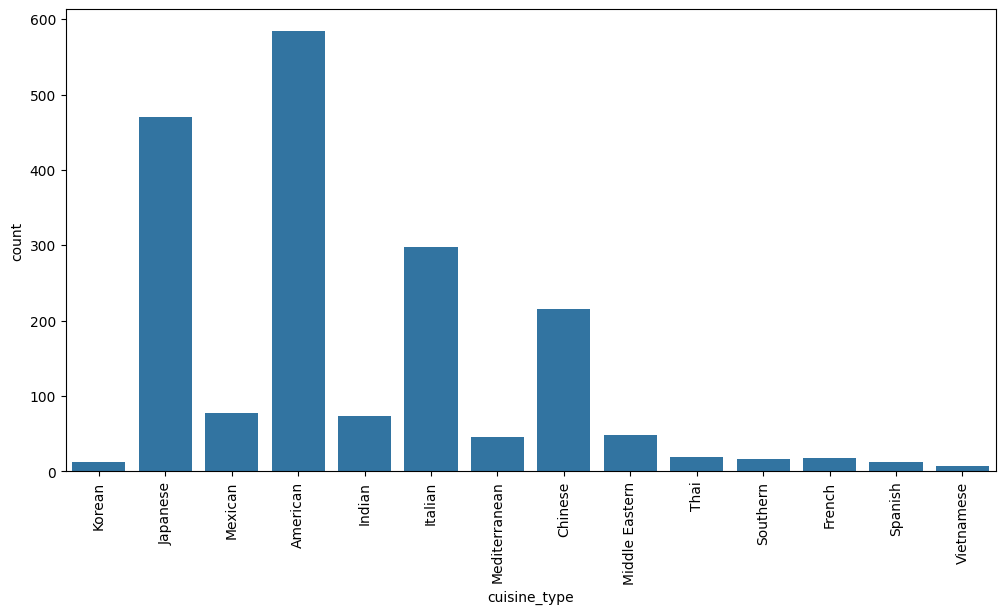

In [18]:
# Creating visualization of the number of orders categorized by each cuisine type
plt.figure(figsize = (12,6))
sns.countplot(data=df, x = "cuisine_type")
plt.xticks(rotation=90)
plt.show()

* The top four most popular cuisine types are: American, Japanese, Italian, and Chinese. 

##### Cost of the order

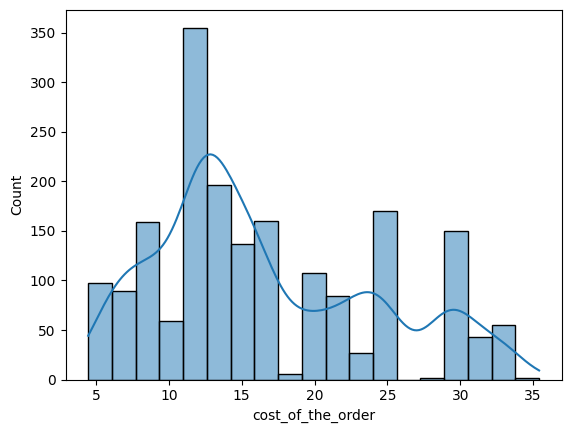

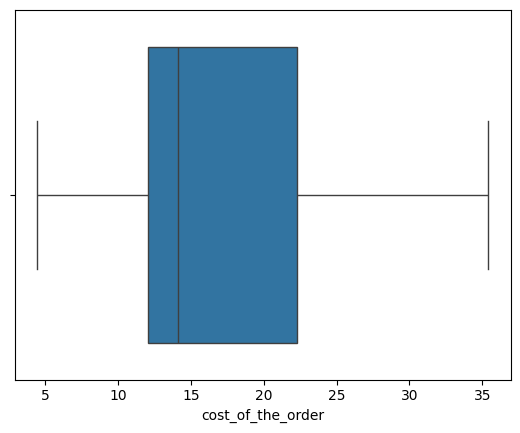

In [19]:
# The following code snippet visualizes the distribution of the cost of the orders
sns.histplot(data=df, x = "cost_of_the_order", kde=True)
plt.show()
sns.boxplot(data=df, x = "cost_of_the_order")
plt.show()

* The visualizations illustrate that order price ranges from 5 to 35 dollars with the median price being approximately 14 dollars
* The most frequent order price is around 12 dollars

##### Day of the week

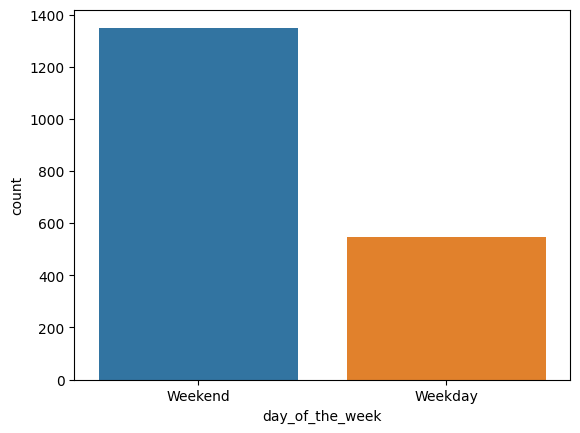

In [20]:
# Creating visualization to show the number of orders categorized by the day of the week
sns.countplot(data=df, x = "day_of_the_week",  hue= "day_of_the_week")
plt.show()

* The visualizations illustrate that the amount of orders on weekends is almost three times higher compared to weekdays

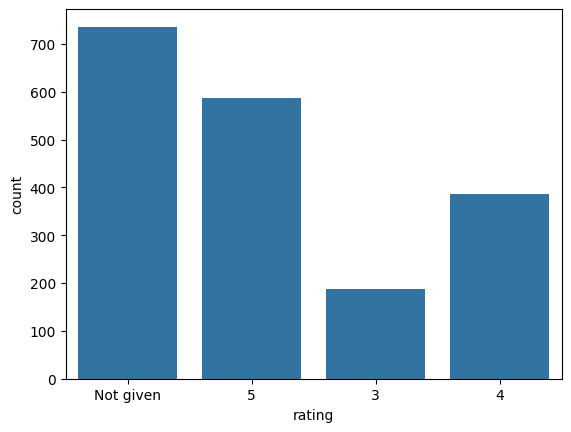

In [21]:
# Creating visualization with a number of ratings for each rating score
sns.countplot(data=df, x="rating");

* Based on the visual representation, it is evident that the rating was not given to over 700 out of 1989 orders
* Among the orders that did receive ratings, the most prevalent rating is 5, with approximately 600 orders. The rating of 4 was given to approximately 370 orders. The rating of 3 is observed in nearly 200 orders.

##### Food preparation time

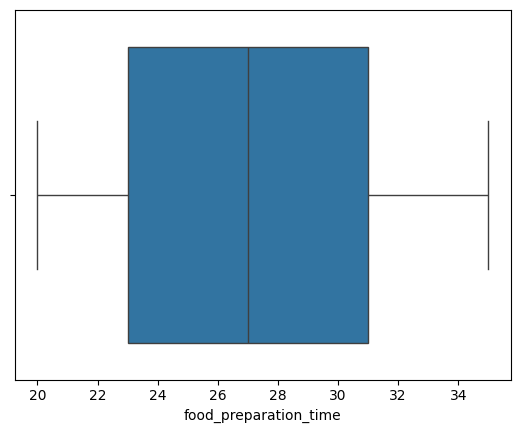

In [22]:
# Illustrating the distribution of order preparation time with boxplot
sns.boxplot(data=df, x = "food_preparation_time")
plt.show()

* The visual representation indicates that the food preparation time spans from 20 to 35 minutes, with a median preparation time of 25 minutes.

##### Delivery time

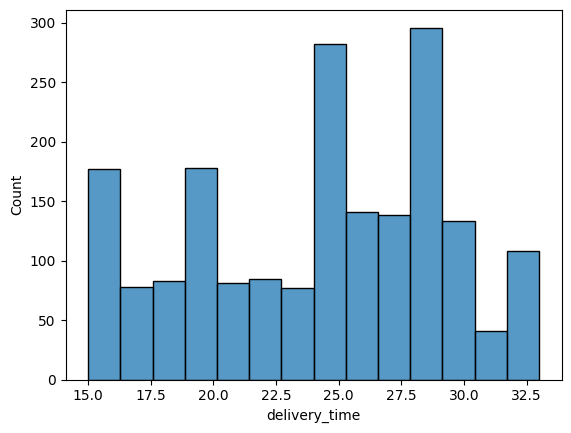

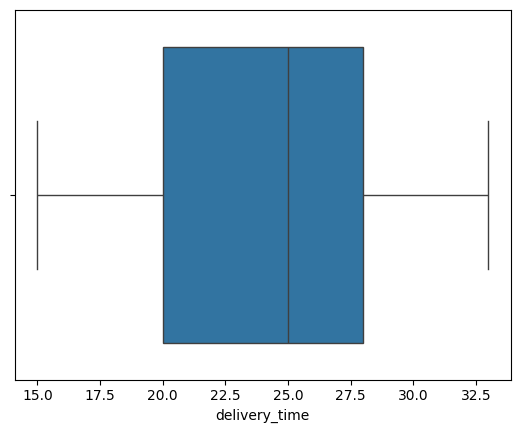

In [23]:
# Showing the distribution of order delivery times with histplot and boxplot
sns.histplot(data=df, x = "delivery_time")
plt.show()
sns.boxplot(data=df, x = "delivery_time")
plt.show()

* The visual analysis reveals that food delivery time falls within the range of 15 to 33 minutes, with a median delivery time of 25 minutes.

In [24]:
# Computing the top 5 restaurants based on the number of orders, sorted from highest to lowest
df["restaurant_name"].value_counts().sort_values(ascending=False).head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
The top five most popular restaurants are:
* Shake Shack - 219 orders
* The Meatball Shop - 132 orders
* Blue Ribbon Sushi - 119 orders
* Blue Ribbon Fried Chicken - 96 orders
* Parm - 68 orders

In [25]:
# Checking the most popular cuisine on weekends
df_weekend = df[df["day_of_the_week"] == "Weekend"]
df_weekend["cuisine_type"].value_counts().sort_values(ascending=False).head()

American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: cuisine_type, dtype: int64

#### Observations:
The most popular cuisine on weekends is "American"

In [26]:
# Computing the percentage of the orders that are more than 20 dollars
df[df["cost_of_the_order"] > 20].shape[0] / df.shape[0] * 100

29.24130663856691

#### Observations:
* Approximately 29 percent of orders cost more than 20 dollars


In [27]:
# Computing the average of the order delivery time and rounding output to two decimal points
df["delivery_time"].mean().round(2)

24.16

#### Observations:
* Average delivery time is 24.16 minutes

In [28]:
# Calculating the number of orders for each customer and sorting them in descending order
df["customer_id"].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
* The top three frequently occurring customer IDs are: 52832, 47440, and 83287, with 13, 10, and 9 orders respectively.


### Multivariate Analysis

#### Cuisine type and Cost of the order

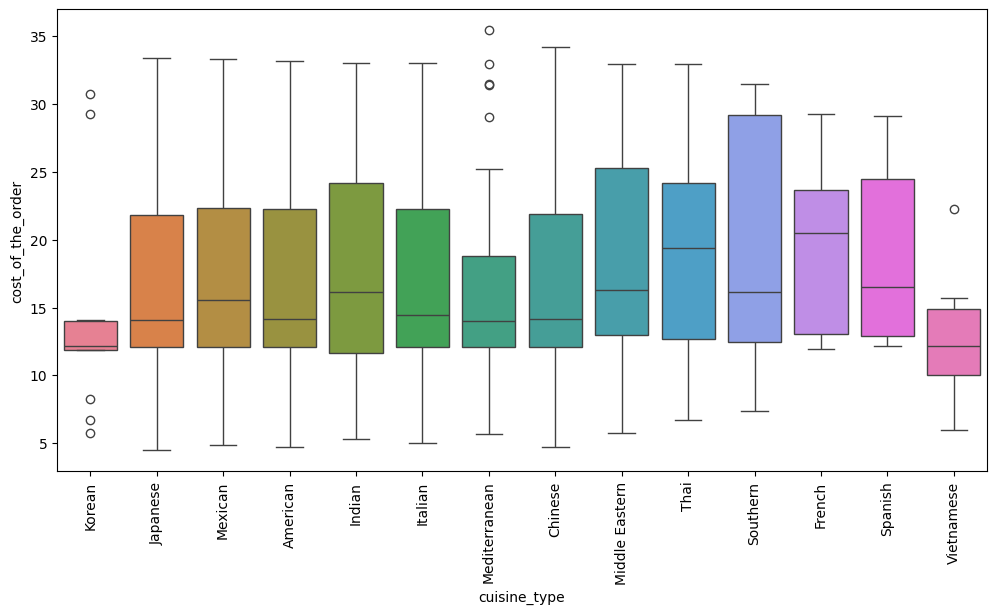

In [29]:
# Creating a visualization to illustrate the correlation between the cost of the order and the cuisine type.
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="cuisine_type", y="cost_of_the_order", hue="cuisine_type")
plt.xticks(rotation=90);

#### Observation 
* The visualization above reveals that the median price for all cuisines falls within the range of 12 to 20 dollars. Among these, French and Thai cuisines exhibit the highest median prices, while Korean and Vietnamese cuisines display the lowest median prices.
* The widest range of prices is observed in Mediterranean and Chinese cuisines..

#### Cousine type and Preparation time

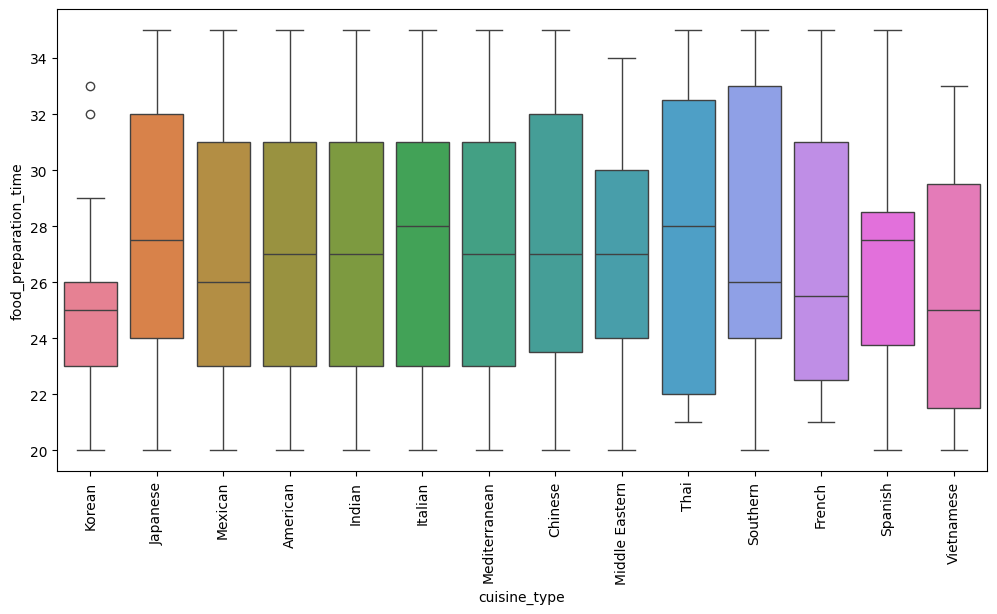

In [30]:
# Creating a visualization to illustrate the correlation between the food preparation time and the cuisine type
plt.figure(figsize=(12,6))
sns.boxplot(data = df, x = "cuisine_type", y="food_preparation_time", hue="cuisine_type")
plt.xticks(rotation=90);

#### Observation
* The visualization above indicates that the preparation times for most cuisine types are similar, except for Korean cuisine, which stands out as the fastest to prepare.

##### Day of the Week and Delivery time / Food preparation time

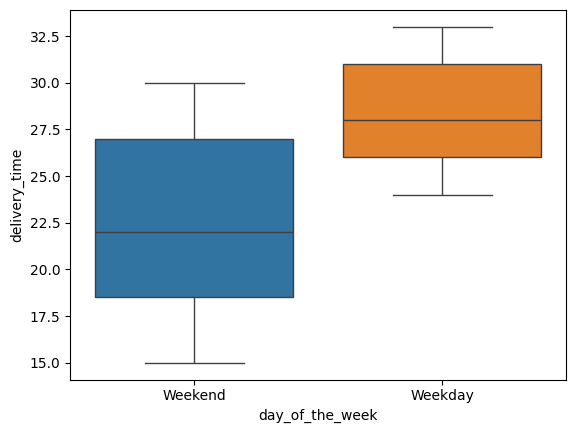

In [31]:
# Creating the visualization to illustrate the correlation between the day of the week and delivery time
sns.boxplot(data=df, x="day_of_the_week", y="delivery_time", hue="day_of_the_week");

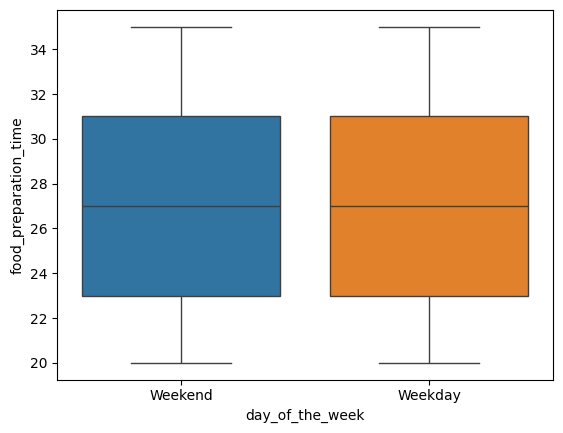

In [32]:
#Creating the visualization to illustrate the correlation between the day of the week and food preparation time
sns.boxplot(data=df, x="day_of_the_week", y="food_preparation_time", hue="day_of_the_week");

#### Observation
* The visualization above points to shorter delivery times on weekends compared to weekdays
* The median delivery time during weekends is approximately 22 minutes, while on weekdays around 28 minut
* Food preparation time is the same during the weekdays and weekendsess

#### Rating and Time

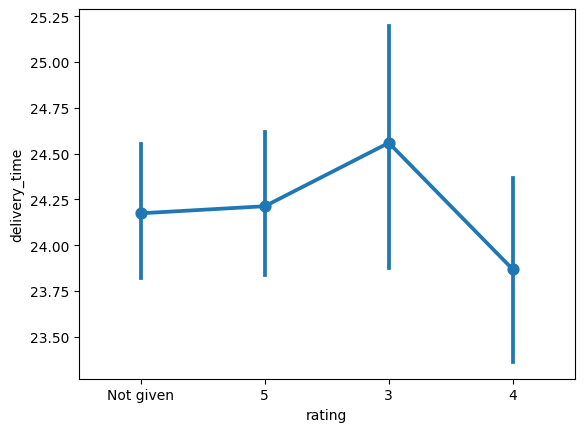

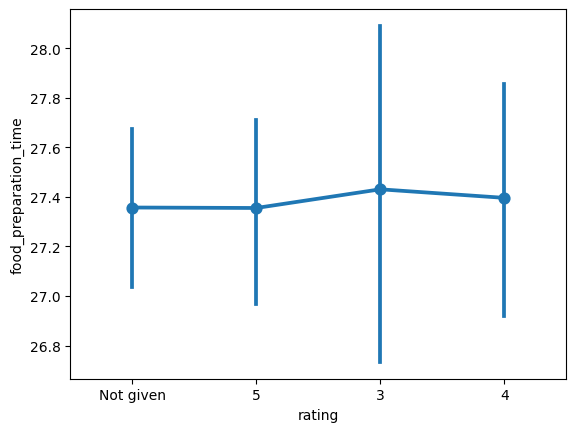

In [33]:
# Creating the pointplot visualizations of the relationship between rating/delivery time and rating/food preparation time
sns.pointplot(data= df, x = "rating", y = "delivery_time")
plt.show()
sns.pointplot(data= df, x = "rating", y = "food_preparation_time")
plt.show()

In [34]:
# The following code snippet creates an additional column with total order time (food preparation time plus delivery time)
df["total_time"] = df["delivery_time"]+df["food_preparation_time"]
# Creating a copy from the "df" with the name "df_rated" with droped rows where rating is Not given
df_rated=df[df["rating"]!="Not given"].copy()

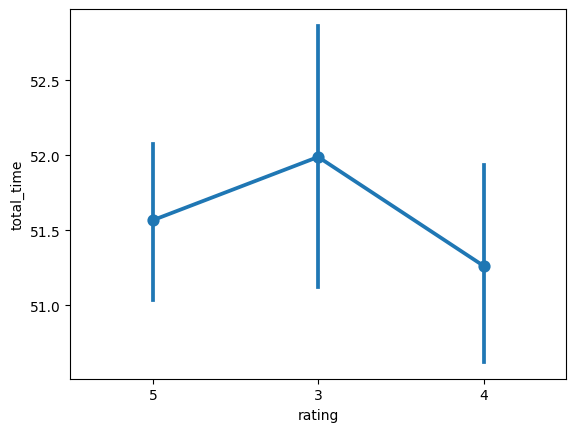

In [35]:
sns.pointplot(data=df_rated, x = "rating", y = "total_time");

#### Observation
* Based on the graphs above, it's apparent that orders with rating of 3 are slower in food preparation time, food delivery time, and total order time compared to other ratings.

#### Rating and Cost of the order

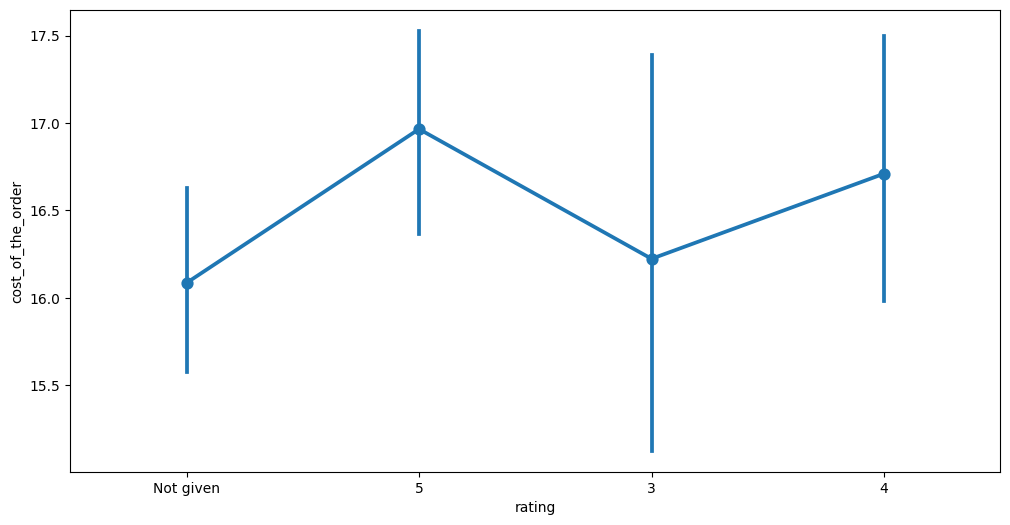

In [36]:
# Creating visualization to show a correlation between the rating and the cost of the order.
plt.figure(figsize=(12, 6))
sns.pointplot(data=df, y="cost_of_the_order", x="rating");

#### Observations
* From the graph above we can see that higher-cost orders are rated higher compared to lower-cost orders.
* The orders with a rating Not given tend to be the lowest cost.

#### Correlation between variables

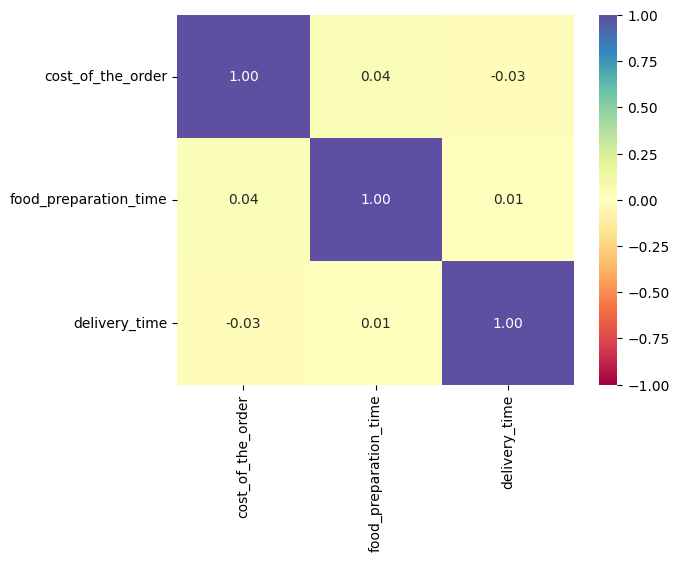

In [37]:
# Checking the correlation map to show the relationship between different numerical columns
num_col_list = ["cost_of_the_order", "food_preparation_time", "delivery_time"]
sns.heatmap(df[num_col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Observation
* The cost of the order, preparation time and time of delivery columns have very low correlation. 

##### Total Revenue by the Restaurant and Cuisine

In [38]:
# Calculating the top 14 restaurants by the revenue generated, also identifying the type of cuisine they are offering
df.groupby(["restaurant_name", "cuisine_type"])["cost_of_the_order"].sum().sort_values(ascending = False).head(14)

restaurant_name                cuisine_type
Shake Shack                    American       3579.53
Blue Ribbon Sushi              Japanese       1903.95
The Meatball Shop              Italian        1821.01
Blue Ribbon Fried Chicken      American       1662.29
Parm                           Italian        1112.76
RedFarm Broadway               Chinese         965.13
RedFarm Hudson                 Chinese         921.21
TAO                            Japanese        834.50
Han Dynasty                    Chinese         755.29
Blue Ribbon Sushi Bar & Grill  Japanese        666.62
Rubirosa                       Italian         660.45
Sushi of Gari 46               Japanese        640.87
Nobu Next Door                 Japanese        623.67
Five Guys Burgers and Fries    American        506.47
Name: cost_of_the_order, dtype: float64

In [39]:
# Checking cuisines sorted by the total revenue generated in descending order 
df.groupby(["cuisine_type"])["cost_of_the_order"].sum().sort_values(ascending = False).head(14)

cuisine_type
American         9530.78
Japanese         7663.13
Italian          4892.77
Chinese          3505.62
Mexican          1303.85
Indian           1235.14
Middle Eastern    922.21
Mediterranean     711.84
Thai              364.95
French            356.29
Southern          328.11
Spanish           227.93
Korean            182.02
Vietnamese         90.18
Name: cost_of_the_order, dtype: float64

#### Observations
* Based on the data, it is evident that the top three restaurants by revenue are Shake Shack, Blue Ribbon Sushi, and The Meatball Shop, offering American, Japanese, and Italian cuisine respectively
* The top cuisines by revenue generated are American, Japanese, and Italian

In [40]:
# Converting the rating column from a filtered dataset (df_rated) from question 12, object to integer
df_rated["rating"] = df_rated["rating"].astype("int")

# Createing a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [41]:
# Creating the dataset with restaurant names that have rating count of more than 50
rest_names = df_rating_count[df_rating_count["rating"]>50]["restaurant_name"]

# Filtering to get the data of restaurants that have rating count of more than 50
df_50_ratings = df_rated[df_rated["restaurant_name"].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean = df_50_ratings.groupby(["restaurant_name"])["rating"].mean().sort_values(ascending = False).reset_index().dropna()

# Creating the dataset of restaurants with ratings greater than 4 and with more than 50 ratings.
df_mean_4 = df_mean[df_mean["rating"] >4]
df_mean_4.head()


,restaurant_name,rating
0,The Meatball Shop,4.51
1,Blue Ribbon Fried Chicken,4.33
2,Shake Shack,4.28
3,Blue Ribbon Sushi,4.22


#### Observations:
According to the filtered dataset, four following restaurants have received over 50 ratings, each with a rating score exceeding 4:
* The Meatball Shop
* Blue Ribbon Fried Chicken
* Shake Shack
* Blue Ribbon Sushi


In [42]:
# Creating a function to calculate the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0
        
# Adding a column to the dataset with calculated revenue per order
df["net_revenue"] = df["cost_of_the_order"].apply(compute_rev)

# Calculating the sum of the revenue column and printing the result
total_rev = df["net_revenue"].sum()
print("The net revenue is around", round(total_rev, 2), "dollars")

The net revenue is around 6166.3 dollars


#### Observations:
* Net revenue generated by the company is 6166.3 dollars

In [43]:
# Utilizing the column of the sum of delivery and preparation time created in question 12, to filter the orders with a delivery time exceeding 60
del_time_over_60 = df[df["total_time"]>60]

# Calculate and print the percentage of orders exceeding 60 of the total delivery time.
precent_del_time_over_60 = (del_time_over_60.shape[0]/df.shape[0])*100
print("Percentage of orders with total delivery time more then 60 minutes is:", round(precent_del_time_over_60,2),"%")

Percentage of orders with total delivery time more then 60 minutes is: 10.54 %


#### Observations:
* Approximately 10.54% of orders have delivery times exceeding 60 minutes from the point of order placement.

In [44]:
# Calculating and printing the average delivery time on weekdays and weekends, and rounding the output
print(" The mean delivery time on weekdays is around",
      round(df[df["day_of_the_week"] == "Weekday"]["delivery_time"].mean()),
     "minutes","\n","The mean delivery time on weekends is around",
      round(df[df["day_of_the_week"] == "Weekend"]["delivery_time"].mean()),
     "minutes")

 The mean delivery time on weekdays is around 28 minutes 
 The mean delivery time on weekends is around 22 minutes


#### Observations:
* On average, weekend delivery times are six minutes shorter compared to weekdays. Specifically, weekends average at 22 minutes, whereas weekdays average at 28 minutes.

### Conclusion and Recommendations

### Conclusions:
After examining the dataset provided, the following observations were made:

* Most popular cuisines are American, Japanese and Italian
* There is nearly three times the number of orders on weekends compared to weekdays.
* The median food preparation time is 25 minutes.
* The median food delivery time is also 25 minutes.
* Delivery times on weekends are typically 6 minutes shorter compared to weekdays.
* Faster order deliveries tend to receive higher ratings.
* Orders with higher costs also tend to receive higher ratings.
* More than one-third of orders are not rated.

### Recommendations:
* Considering the significant number of orders without ratings, it is advisable to impruve customer feedback requests to gain a better understanding of customer preferences and behavior.
* Since weekends see a surge in orders, it's smart to focus on boosting orders during those days. This might mean adjusting our advertising efforts to promote popular restaurants and cuisines more heavily on weekends.
* To speed up weekday deliveries, recommending restaurants that are closer to customers would be beneficial. This would result in faster food delivery and possibly higher ratings.
* Suggesting the most popular cuisines and restaurants could boost the number of total orders.